<a href="https://colab.research.google.com/github/Seenuprime/Data-Analytics/blob/main/Huge_movies_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np

In [76]:
!kaggle datasets download -d alanvourch/tmdb-movies-daily-updates

Dataset URL: https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates
License(s): Apache 2.0
tmdb-movies-daily-updates.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
import zipfile

zip_dir = zipfile.ZipFile('/content/tmdb-movies-daily-updates.zip')
zip_dir.extractall()
zip_dir.close()

In [78]:
df = pd.read_csv(r'/content/TMDB_all_movies.csv')
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
0,2,Ariel,7.1,326.0,Released,1988-10-21,0.0,73.0,0.0,tt0094675,...,Finland,suomi,"Esko Salminen, Esko Nikkari, Turo Pajala, Matt...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Aki Kaurismäki,NaN,7.4,8553.0
1,3,Shadows in Paradise,7.3,369.0,Released,1986-10-17,0.0,74.0,0.0,tt0092149,...,Finland,"suomi, English, svenska","Esko Nikkari, Matti Pellonpää, Malla Hukkanen,...",Aki Kaurismäki,Timo Salminen,Aki Kaurismäki,Mika Kaurismäki,NaN,7.5,7292.0
2,5,Four Rooms,5.8,2578.0,Released,1995-12-09,4257354.0,98.0,4000000.0,tt0113101,...,United States of America,English,"Kimberly Blair, Sammi Davis, Paul Skemp, Bruce...","Alexandre Rockwell, Quentin Tarantino, Allison...","Andrzej Sekula, Rodrigo García, Guillermo Nava...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Lawrence Bender, Quentin T...",Combustible Edison,6.7,111718.0
3,6,Judgment Night,6.5,326.0,Released,1993-10-15,12136938.0,109.0,21000000.0,tt0107286,...,United States of America,English,"Doug Wert, Michael DeLorenzo, Everlast, Christ...",Stephen Hopkins,Peter Levy,"Jere Cunningham, Lewis Colick","Marilyn Vance, Gene Levy, Lloyd Segan",Alan Silvestri,6.6,19032.0
4,8,Life in Loops (A Megacities RMX),7.5,27.0,Released,2006-01-01,0.0,80.0,42000.0,tt0825671,...,Austria,"English, हिन्दी, 日本語, Pусский, Español",NaN,Timo Novotny,Wolfgang Thaler,"Michael Glawogger, Timo Novotny","Ulrich Gehmacher, Timo Novotny",NaN,8.1,282.0


In [79]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [80]:
df.isna().sum()

,0
id,0
title,8
vote_average,2
vote_count,2
status,2
release_date,95089
revenue,2
runtime,2
budget,2
imdb_id,390256


In [81]:
df.dropna(subset=['title'], inplace=True)

In [82]:
df.isna().sum()

,0
id,0
title,0
vote_average,0
vote_count,0
status,0
release_date,95084
revenue,0
runtime,0
budget,0
imdb_id,390248


In [83]:
revenue_title = df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
revenue_title

,title,revenue
916185,TikTok Rizz Party,3.000000e+09
12058,Avatar,2.923706e+09
183547,Avengers: Endgame,2.799439e+09
53918,Avatar: The Way of Water,2.320250e+09
471,Titanic,2.264162e+09
89041,Star Wars: The Force Awakens,2.068224e+09
183549,Avengers: Infinity War,2.052415e+09
448036,Spider-Man: No Way Home,1.921847e+09
86544,Jurassic World,1.671537e+09
283048,The Lion King,1.663000e+09


Text(0.5, 1.0, 'Revenue over Title')

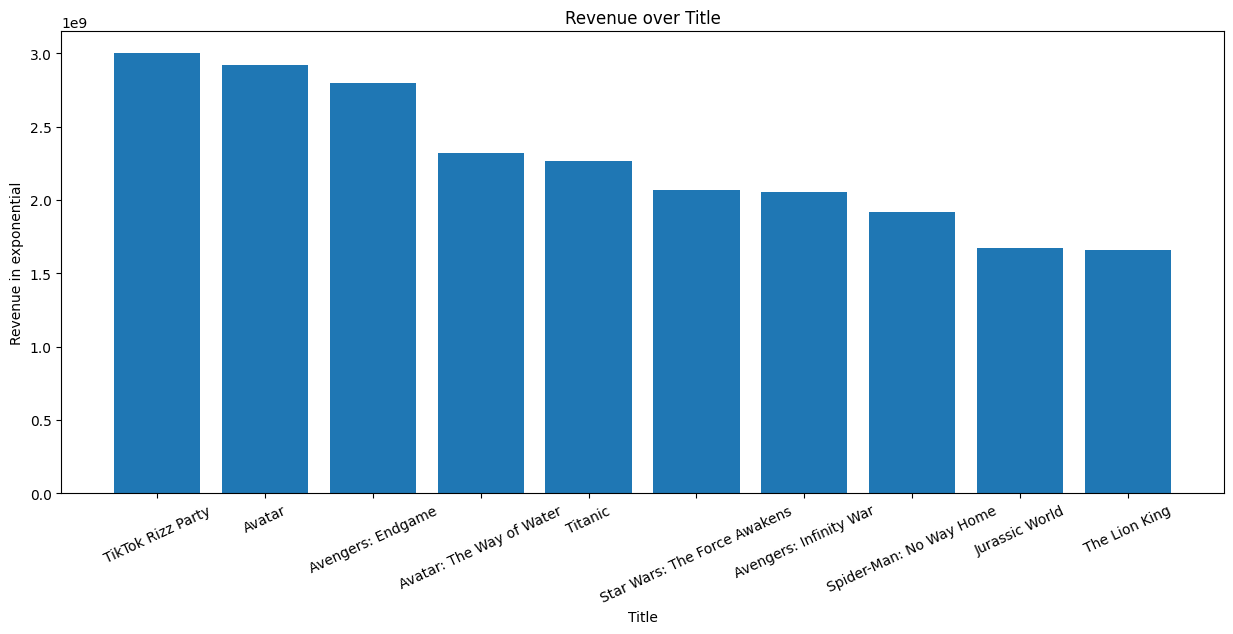

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(revenue_title.title, revenue_title.revenue)
plt.xticks(rotation=25)
plt.xlabel('Title')
plt.ylabel('Revenue in exponential')
plt.title('Revenue over Title')

In [85]:
budget_title = df[['title', 'budget', 'revenue']].sort_values(by='budget', ascending=False).head(10)
budget_title

,title,budget,revenue
726370,Крик 4,645654654.0,5.465468e+08
261167,Avatar 5,600000000.0,0.000000e+00
125558,Avatar 4,500000000.0,0.000000e+00
53918,Avatar: The Way of Water,460000000.0,2.320250e+09
59423,Avatar 3,400000000.0,0.000000e+00
1238,Pirates of the Caribbean: On Stranger Tides,379000000.0,1.045700e+09
68078,Avengers: Age of Ultron,365000000.0,1.405404e+09
183547,Avengers: Endgame,356000000.0,2.799439e+09
254914,Fast X,340000000.0,7.047097e+08
391416,Gladiator II,310000000.0,0.000000e+00


In [86]:
df[df['title'].isin(['Avatar 5', 'Avatar 4', 'Avatar 3'])].index

Index([59423, 125558, 261167], dtype='int64')

In [87]:
filt = df[df['title'].isin(['Avatar 5', 'Avatar 4', 'Avatar 3'])].index
df.drop(filt, inplace=True)

Text(0.5, 1.0, 'Budget over Title')

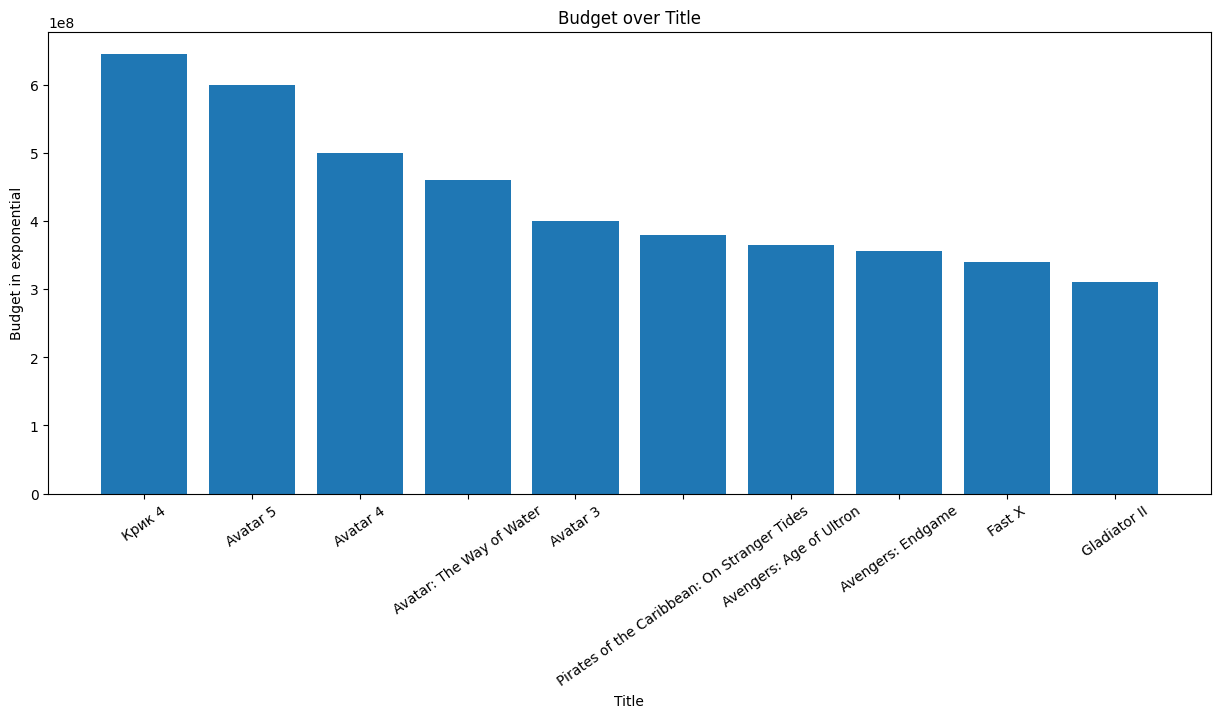

In [88]:
plt.figure(figsize=(15, 6))
plt.bar(budget_title.title, budget_title.budget)
plt.xticks(rotation=35)
plt.xlabel('Title')
plt.ylabel('Budget in exponential')
plt.title('Budget over Title')

In [89]:
title_runtime = df[['title', 'runtime', 'revenue']].sort_values(by='runtime', ascending=False).head(10)
title_runtime

,title,runtime,revenue
143582,Modern Times Forever,14400.0,0.0
504670,Svalbard minutt for minutt,13319.0,0.0
159980,Cinématon,12480.0,0.0
115868,Beijing 2003,9000.0,0.0
509428,Untitled #125 (Hickory),7200.0,0.0
223259,Matrjoschka,5700.0,0.0
79182,The Cure For Insomnia,5220.0,0.0
241416,#ALLMYMOVIES,4320.0,0.0
120356,Giant 600 Cartoon Collection,3720.0,0.0
178974,The Longest Most Meaningless Movie in the World,2880.0,0.0


In [90]:
df[df.index == 143582]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,imdb_id,...,production_countries,spoken_languages,cast,director,director_of_photography,writers,producers,music_composer,imdb_rating,imdb_votes
143582,251800,Modern Times Forever,7.0,2.0,Released,2011-03-23,0.0,14400.0,0.0,tt2659636,...,"Denmark, Finland, Vietnam",Dansk,NaN,"Rasmus Nielsen, Jakob Fenger, Bjornstjerne Reu...",NaN,NaN,NaN,NaN,6.3,101.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Modern Times Forever'),
  Text(1, 0, 'Svalbard minutt for minutt'),
  Text(2, 0, 'Cinématon'),
  Text(3, 0, 'Beijing 2003'),
  Text(4, 0, 'Untitled #125 (Hickory)'),
  Text(5, 0, 'Matrjoschka'),
  Text(6, 0, 'The Cure For Insomnia'),
  Text(7, 0, '#ALLMYMOVIES'),
  Text(8, 0, 'Giant 600 Cartoon Collection'),
  Text(9, 0, 'The Longest Most Meaningless Movie in the World')])

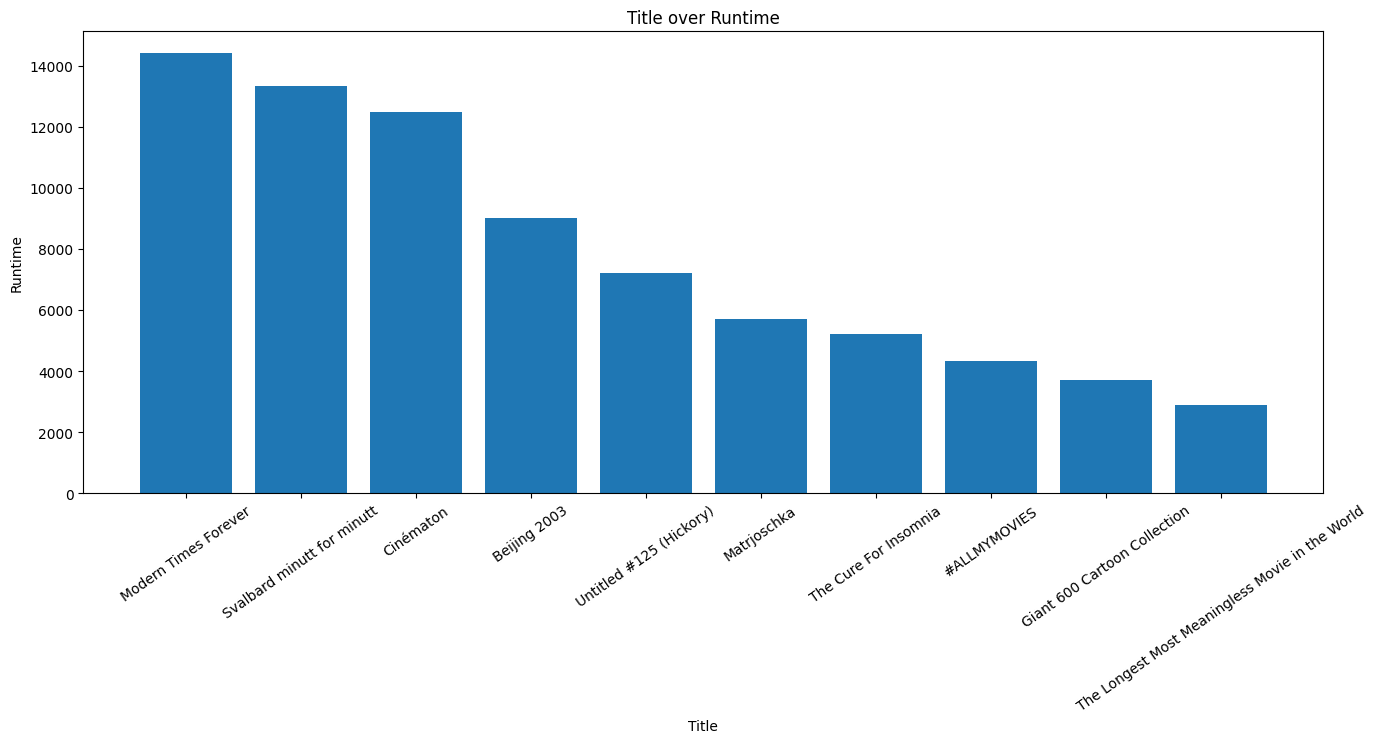

In [91]:
plt.figure(figsize=(16,6))
plt.bar(title_runtime.title, title_runtime.runtime)
plt.title('Title over Runtime')
plt.xlabel('Title')
plt.ylabel('Runtime')
plt.xticks(rotation=35)

In [92]:
most_languages = df.original_language.value_counts()
most_languages.head(10)

,count
original_language,
en,485478
fr,60856
es,54934
de,46317
ja,41990
pt,29783
zh,25526
ru,23018
it,22365


Text(0.5, 1.0, 'Movies count over Languages')

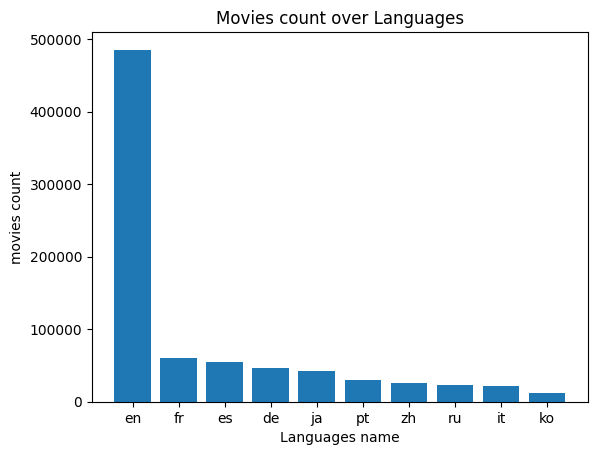

In [93]:
plt.bar(most_languages.index[:10], most_languages.values[:10])
plt.xlabel('Languages name')
plt.ylabel('movies count')
plt.title('Movies count over Languages')

In [94]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [95]:
most_voted = df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False)
most_voted.head(10)

,title,vote_count
16346,Inception,36068.0
96740,Interstellar,34822.0
116,The Dark Knight,32294.0
12058,Avatar,31106.0
178665,Deadpool,30353.0
14443,The Avengers,30314.0
183549,Avengers: Infinity War,29195.0
428,Fight Club,28879.0
78058,Guardians of the Galaxy,27657.0
550,Pulp Fiction,27440.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Inception'),
  Text(1, 0, 'Interstellar'),
  Text(2, 0, 'The Dark Knight'),
  Text(3, 0, 'Avatar'),
  Text(4, 0, 'Deadpool'),
  Text(5, 0, 'The Avengers'),
  Text(6, 0, 'Avengers: Infinity War'),
  Text(7, 0, 'Fight Club'),
  Text(8, 0, 'Guardians of the Galaxy'),
  Text(9, 0, 'Pulp Fiction')])

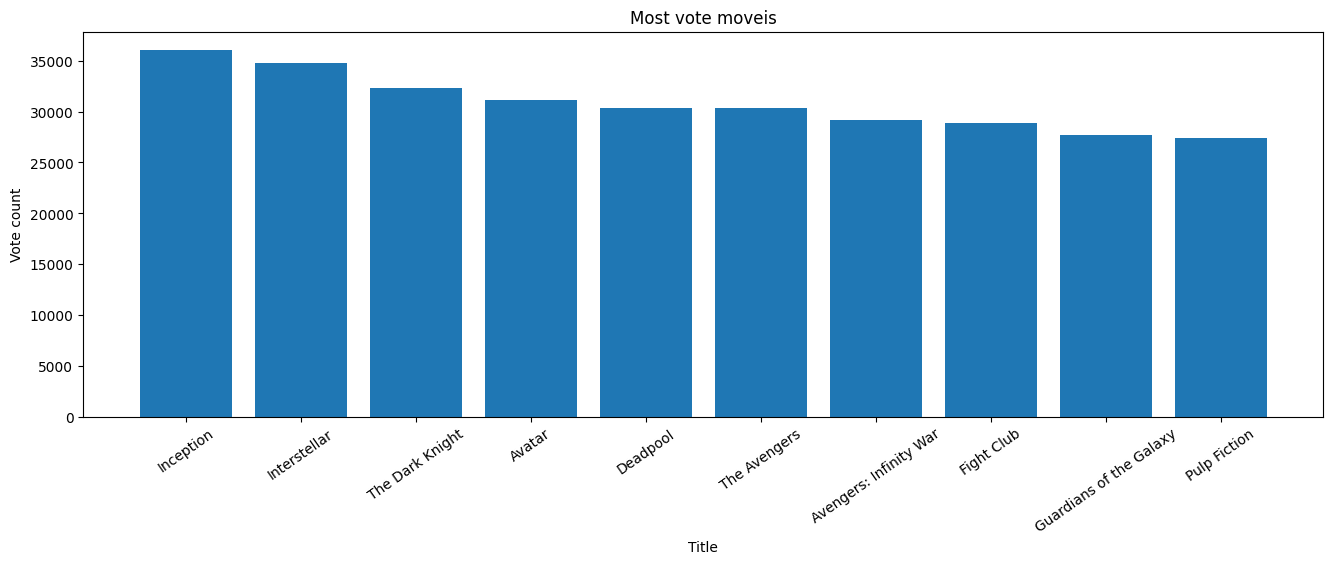

In [96]:
plt.figure(figsize=(16, 5))
plt.bar(most_voted.title[:10], most_voted.vote_count[:10])
plt.title('Most vote moveis')
plt.xlabel('Title')
plt.ylabel('Vote count')
plt.xticks(rotation=35)

In [97]:
popularity = df[['title', 'popularity']].sort_values(by='popularity', ascending=False)
popularity.head(10)

,title,popularity
372672,Deadpool & Wolverine,19813.958
402169,Bad Boys: Ride or Die,4397.305
726775,Inside Out 2,3367.586
361045,Despicable Me 4,2714.677
543376,A Quiet Place: Day One,2659.712
571674,The Ministry of Ungentlemanly Warfare,1636.275
533399,The Garfield Movie,1247.665
863645,Justice League: Crisis on Infinite Earths Part...,1070.360
744841,My Spy The Eternal City,979.672
500133,Trigger Warning,978.471


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Deadpool & Wolverine'),
  Text(1, 0, 'Bad Boys: Ride or Die'),
  Text(2, 0, 'Inside Out 2'),
  Text(3, 0, 'Despicable Me 4'),
  Text(4, 0, 'A Quiet Place: Day One'),
  Text(5, 0, 'The Ministry of Ungentlemanly Warfare'),
  Text(6, 0, 'The Garfield Movie'),
  Text(7, 0, 'Justice League: Crisis on Infinite Earths Part Three'),
  Text(8, 0, 'My Spy The Eternal City'),
  Text(9, 0, 'Trigger Warning')])

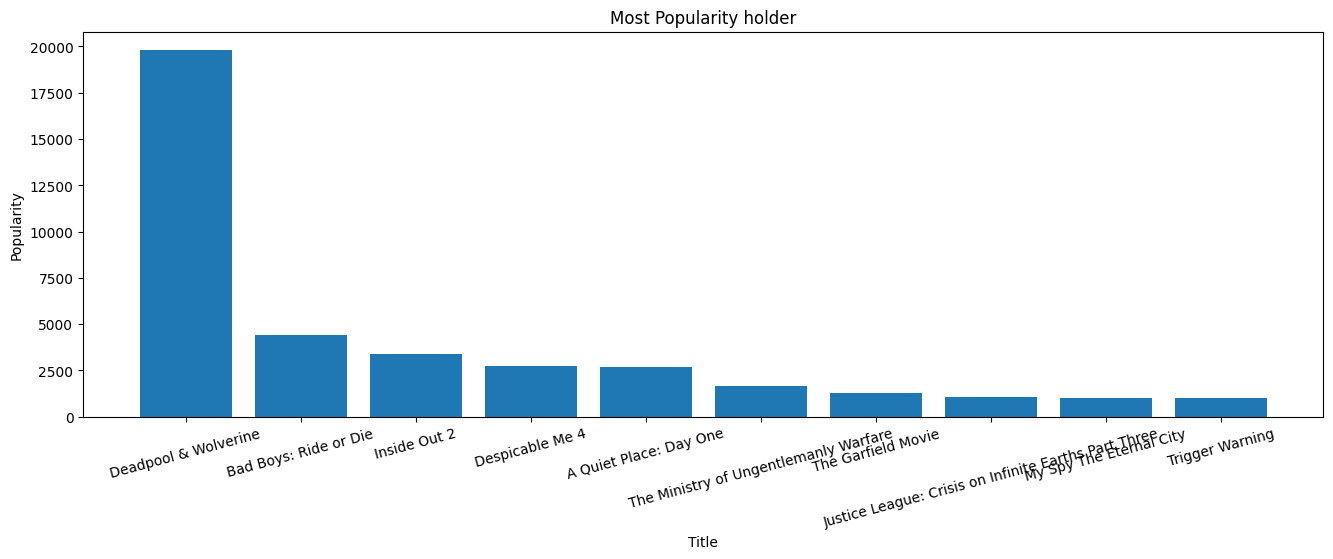

In [98]:
plt.figure(figsize=(16, 5))
plt.bar(popularity.title[:10], popularity.popularity[:10])
plt.title('Most Popularity holder')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.xticks(rotation=15)

In [99]:
df.genres.unique()

array(['Drama, Comedy, Romance, Crime', 'Comedy, Drama, Romance',
       'Comedy', ..., 'Comedy, Fantasy, Documentary',
       'Adventure, Drama, Fantasy, Mystery, Science Fiction',
       'Drama, Mystery, Western, Science Fiction'], dtype=object)

In [100]:
common_genres = df.genres.unique()
common_genres[:20]

array(['Drama, Comedy, Romance, Crime', 'Comedy, Drama, Romance',
       'Comedy', 'Action, Crime, Thriller', 'Documentary', 'Drama',
       'Adventure, Action, Science Fiction', 'Animation, Family',
       'Mystery, Drama', 'Drama, Crime', 'Horror, Thriller, Mystery',
       'Adventure, Fantasy, Action, Thriller, Science Fiction',
       'Drama, Science Fiction', 'Drama, Romance',
       'Adventure, Fantasy, Action', 'Action, Crime', 'Drama, War',
       'Drama, Music, Romance', 'Western', 'Animation, Comedy, Family'],
      dtype=object)

In [101]:
common_genres_df = pd.DataFrame(common_genres, columns=['Genres'])
common_genres_df['Genres'] = common_genres_df['Genres'].str.split(', ')
common_genres_df = common_genres_df.explode('Genres')
common_genres_df

,Genres
0,Drama
0,Comedy
0,Romance
0,Crime
1,Comedy
...,...
13828,Science Fiction
13829,Drama
13829,Mystery
13829,Western


In [102]:
cf_count = common_genres_df.value_counts().sort_values(ascending=False)
cf_count = cf_count.reset_index()
cf_count.columns = ['genre', 'count']
cf_count

,genre,count
0,Drama,5863
1,Comedy,4837
2,Action,4394
3,Adventure,3913
4,Fantasy,3601
5,Thriller,3381
6,Horror,3039
7,Science Fiction,2962
8,Romance,2953
9,Animation,2907


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Science Fiction'),
  Text(8, 0, 'Romance'),
  Text(9, 0, 'Animation'),
  Text(10, 0, 'Mystery'),
  Text(11, 0, 'Family'),
  Text(12, 0, 'Crime'),
  Text(13, 0, 'TV Movie'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'History'),
  Text(16, 0, 'Documentary'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

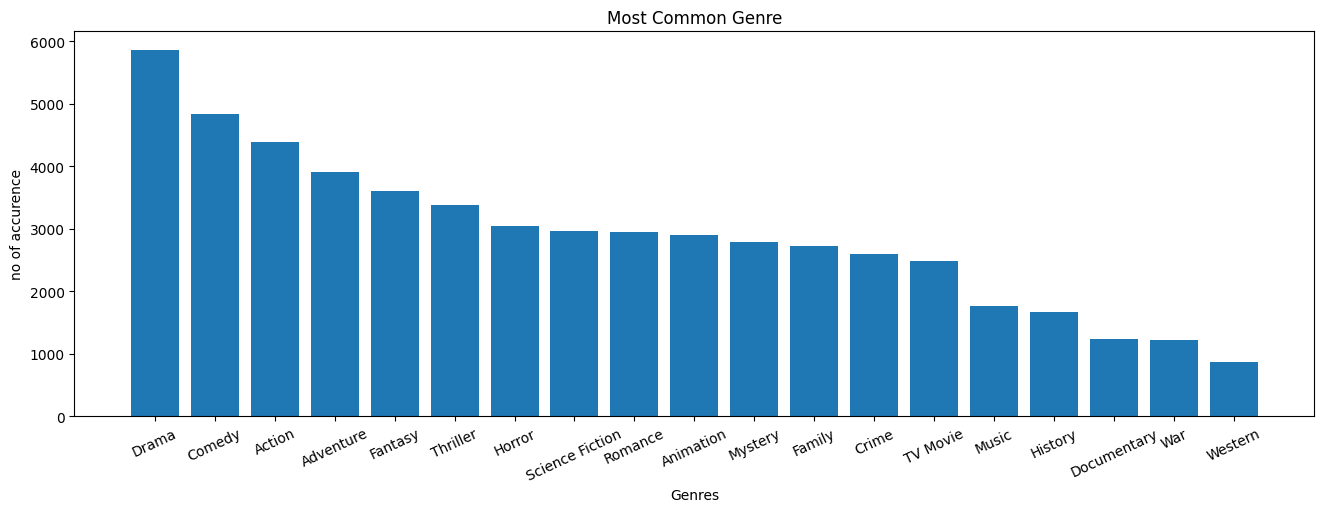

In [103]:
plt.figure(figsize=(16, 5))
plt.bar(cf_count['genre'], cf_count['count'])
plt.title('Most Common Genre')
plt.xlabel('Genres')
plt.ylabel('no of accurence')
plt.xticks(rotation=25)

In [104]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer', 'imdb_rating', 'imdb_votes'],
      dtype='object')

In [105]:
popularity_rating = df[['title', 'original_language', 'popularity', 'imdb_rating']].sort_values(by='popularity', ascending=False)
popularity_rating.head(10)

,title,original_language,popularity,imdb_rating
372672,Deadpool & Wolverine,en,19813.958,8.2
402169,Bad Boys: Ride or Die,en,4397.305,6.8
726775,Inside Out 2,en,3367.586,7.8
361045,Despicable Me 4,en,2714.677,6.3
543376,A Quiet Place: Day One,en,2659.712,6.5
571674,The Ministry of Ungentlemanly Warfare,en,1636.275,6.8
533399,The Garfield Movie,en,1247.665,5.7
863645,Justice League: Crisis on Infinite Earths Part...,en,1070.360,6.0
744841,My Spy The Eternal City,en,979.672,5.6
500133,Trigger Warning,en,978.471,4.6


<ipython-input-112-afeff8f24d96>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(popularity_rating['title'].head(10), rotation=35)


[Text(0, 0, 'Deadpool & Wolverine'),
 Text(1, 0, 'Bad Boys: Ride or Die'),
 Text(2, 0, 'Inside Out 2'),
 Text(3, 0, 'Despicable Me 4'),
 Text(4, 0, 'A Quiet Place: Day One'),
 Text(5, 0, 'The Ministry of Ungentlemanly Warfare'),
 Text(6, 0, 'The Garfield Movie'),
 Text(7, 0, 'Justice League: Crisis on Infinite Earths Part Three'),
 Text(8, 0, 'My Spy The Eternal City'),
 Text(9, 0, 'Trigger Warning')]

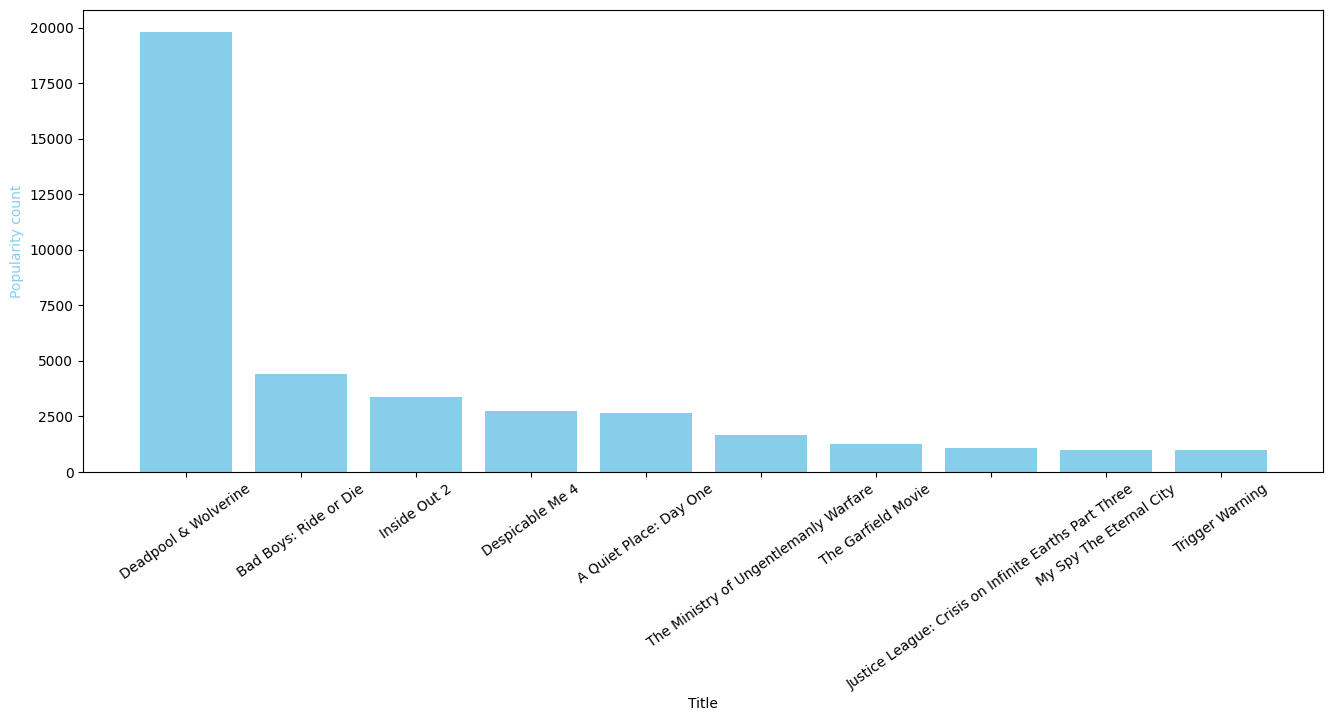

In [112]:
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(popularity_rating['title'].head(10), popularity_rating['popularity'].head(10), color='skyblue', label='Popularity')
ax1.set_xlabel('Title')
ax1.set_ylabel('Popularity count', color='skyblue')
ax1.set_xticklabels(popularity_rating['title'].head(10), rotation=35)

In [ ]:
top_10_english_before_2010 = ranking[(ranking.original_language == 'en') & (ranking.imdb_rating==10.0) & (ranking.release_date < '2011-01-01')]
top_10_english_before_2010